<img width="600" height="200" src="../../datasets/redes.png">

# **Train super-resolution model**
## Purpose
The purpose of this notebook is to train a super-resolution model.

## Setup
### Library import

**Solve "No Algorithm Worked" [Error](https://stackoverflow.com/questions/59340465/how-to-solve-no-algorithm-worked-keras-error)**

In [1]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession

#config = ConfigProto()
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

In [1]:
import tensorflow as tf
#tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**Setup software libraries**

In [2]:
from vizzDL import datasets
from vizzDL import train_v1

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt

## **Train model**
**Create `Train` object**

In [4]:
Train = train_v1.Trainer(folder_path = '../../datasets/processed/Models/', dataset_name = 'L8_S2_SR')

In [5]:
Train.create_model(model_type='CNN', model_output='super_resolution', model_architecture='enhance', model_name='srgan_L8_to_S2', scaling_factor=2)

In [6]:
Train.train(normalize_rgb=True, batch_size=16, shuffle_size=2000, epochs=20)

Epoch 1/20
  56/1750 [..............................] - ETA: 1:18 - loss: 0.7381 - mse: 0.5722

KeyboardInterrupt: 

## **Evaluate model**
**Read the model**

In [ ]:
#model_dir = Train.params['job_dir'] + 'model_weights.h5'
#model = Train.keras_model
#model.load_weights(model_dir)

In [8]:
model = Train.keras_model

**Read metrics**

In [9]:
#with open(Train.params['job_dir'] + 'training_history.json', mode='r') as f:
#    metrics = json.load(f)
#metrics = pd.DataFrame(metrics)

In [9]:
metrics = Train.metrics
metrics

,loss,mse,val_loss,val_mse
0,0.077871,0.006092,0.018999,0.003214
1,0.008057,0.002606,0.017459,0.016262
2,0.003627,0.002674,0.003709,0.003008
3,0.003229,0.002579,0.002589,0.002094
4,0.003022,0.002509,0.003211,0.002866


**Read test dataset**

In [13]:
TFRecord = datasets.read_TFRecords(folder_path = '../../datasets/processed/Models/', dataset_name = 'L8_S2_SR', scaling_factor=2)
test_dataset = TFRecord.get_test_dataset()
test_dataset

<RepeatDataset shapes: ((None, 128, 128, 3), (None, 256, 256, 3)), types: (tf.float32, tf.float32)>

### **Inspect the training process**
**Plot loss**

<AxesSubplot:>

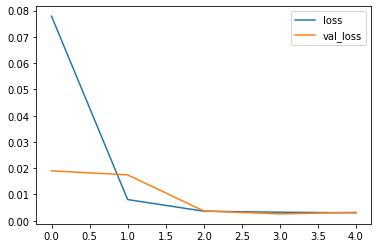

In [14]:
metrics[['loss', 'val_loss']].plot()

**Plot Mean Squared Error**

<AxesSubplot:>

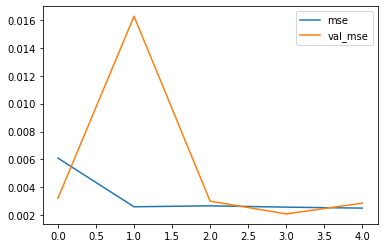

In [15]:
metrics[['mse', 'val_mse']].plot()

### **Evaluate the model on the test data using `evaluate`**

In [16]:
results = model.evaluate(test_dataset, steps=int(params['test_size'] / params['batch_size']))

500/500 [==============================] - 11s 13ms/step - loss: 0.0047 - mse: 0.0043


## **Prediction**
**Read example record**

In [17]:
iterator = iter(test_dataset)

In [55]:
image, label = iterator.get_next()
image = image.numpy()
label = label.numpy()
print("Input shape:", image.shape)
print("Output shape:", label.shape)

Input shape: (1, 128, 128, 3)
Output shape: (1, 256, 256, 3)


**Predict single record**

In [56]:
prediction = model.predict(image)
print("Output shape:", prediction.shape)

Output shape: (1, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Output')

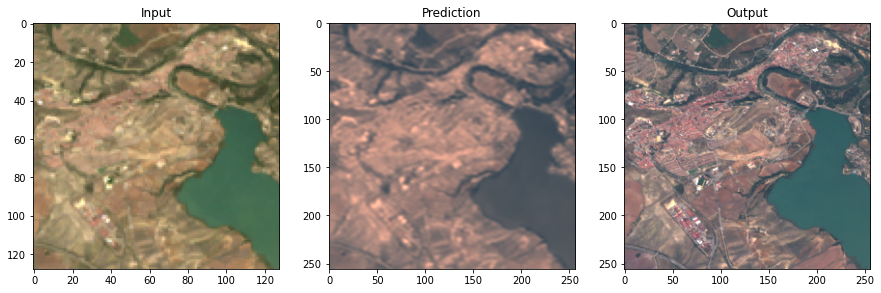

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].imshow((image[0,:,:,:]*255.0).astype(int))
ax[0].set_title('Input')

ax[1].imshow((prediction[0,:,:,:]*255.0).astype(int))
ax[1].set_title('Prediction')

ax[2].imshow((label[0,:,:,:]*255.0).astype(int))
ax[2].set_title('Output')